In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/geojson-file/Borough Boundaries.geojson
/kaggle/input/nyc-noise-data/311_Service_Requests_from_2010_to_Present.csv
/kaggle/input/excel-boundary-data/nybb.csv
/kaggle/input/shp-file/geo_export_0b9079b6-2655-4970-8f24-0b9f2cdaa9cc.shp


In [6]:
import geopandas as gpd
borough_map = gpd.read_file('/kaggle/input/geojson-file/Borough Boundaries.geojson')



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [91]:
df = pd.read_csv("/kaggle/input/nyc-noise-data/311_Service_Requests_from_2010_to_Present.csv")
df.head(5)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (8,20,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Unique Key            Created Date Closed Date Agency  \
0    57146610  03/27/2023 12:00:00 PM         NaN   DSNY   
1    57151102  03/27/2023 12:00:00 PM         NaN   DSNY   
2    57150203  03/27/2023 12:00:00 PM         NaN   DSNY   
3    57146670  03/27/2023 12:00:00 PM         NaN   DSNY   
4    57146669  03/27/2023 12:00:00 PM         NaN   DSNY   

                Agency Name     Complaint Type         Descriptor  \
0  Department of Sanitation  Derelict Vehicles  Derelict Vehicles   
1  Department of Sanitation  Derelict Vehicles  Derelict Vehicles   
2  Department of Sanitation  Derelict Vehicles  Derelict Vehicles   
3  Department of Sanitation  Derelict Vehicles  Derelict Vehicles   
4  Department of Sanitation  Derelict Vehicles  Derelict Vehicles   

  Location Type Incident Zip     Incident Address  ... Road Ramp  \
0        Street      10026.0  20 WEST  115 STREET  ...       NaN   
1        Street      11436.0    120-02 141 STREET  ...       NaN   
2        Street      10026.0  20 WEST  115 STREET  ...       NaN   
3        Street      10026.0  12 WEST  115 STREET  ...       NaN   
4        Street      10029.0        1286 5 AVENUE  ...       NaN   

  Bridge Highway Segment   Latitude  Longitude  \
0                    NaN  40.800401 -73.948025   
1                    NaN  40.675929 -73.800094   
2                    NaN  40.800401 -73.948025   
3                    NaN  40.800212 -73.947584   
4                    NaN  40.796408 -73.949545   

                                  Location Zip Codes Community Districts  \
0  (40.80040122503075, -73.94802487771202)   12423.0                18.0   
1  (40.67592947218846, -73.80009423869451)   24671.0                41.0   
2  (40.80040122503075, -73.94802487771202)   12423.0                18.0   
3  (40.80021163938782, -73.94758437614948)   12423.0                18.0   
4  (40.79640832099274, -73.94954489890628)   12426.0                 7.0   

  Borough Boundaries City Council Districts Police Precincts  
0                4.0                   36.0             18.0  
1                3.0                   46.0             71.0  
2                4.0                   36.0             18.0  
3                4.0                   36.0             18.0  
4                4.0                   36.0             14.0  

[5 rows x 46 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675782 entries, 0 to 675781
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      675782 non-null  int64  
 1   Created Date                    675782 non-null  object 
 2   Closed Date                     604976 non-null  object 
 3   Agency                          675782 non-null  object 
 4   Agency Name                     675782 non-null  object 
 5   Complaint Type                  675782 non-null  object 
 6   Descriptor                      664726 non-null  object 
 7   Location Type                   585234 non-null  object 
 8   Incident Zip                    668436 non-null  object 
 9   Incident Address                643728 non-null  object 
 10  Street Name                     643719 non-null  object 
 11  Cross Street 1                  439772 non-null  object 
 12  Cross Street 2  

In [5]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                        70806
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                         11056
Location Type                      90548
Incident Zip                        7346
Incident Address                   32054
Street Name                        32063
Cross Street 1                    236010
Cross Street 2                    235906
Intersection Street 1             261319
Intersection Street 2             260919
Address Type                        3456
City                               28177
Landmark                          311625
Facility Type                     671894
Status                                 0
Due Date                          673823
Resolution Description             22660
Resolution Action Updated Date     18707
Community Board                        0
BBL             

In [6]:
d_agency = df['Agency Name'].value_counts().head()
d_agency

New York City Police Department                       268820
Department of Housing Preservation and Development    180060
Department of Sanitation                               54188
Department of Transportation                           53691
Department of Environmental Protection                 33791
Name: Agency Name, dtype: int64

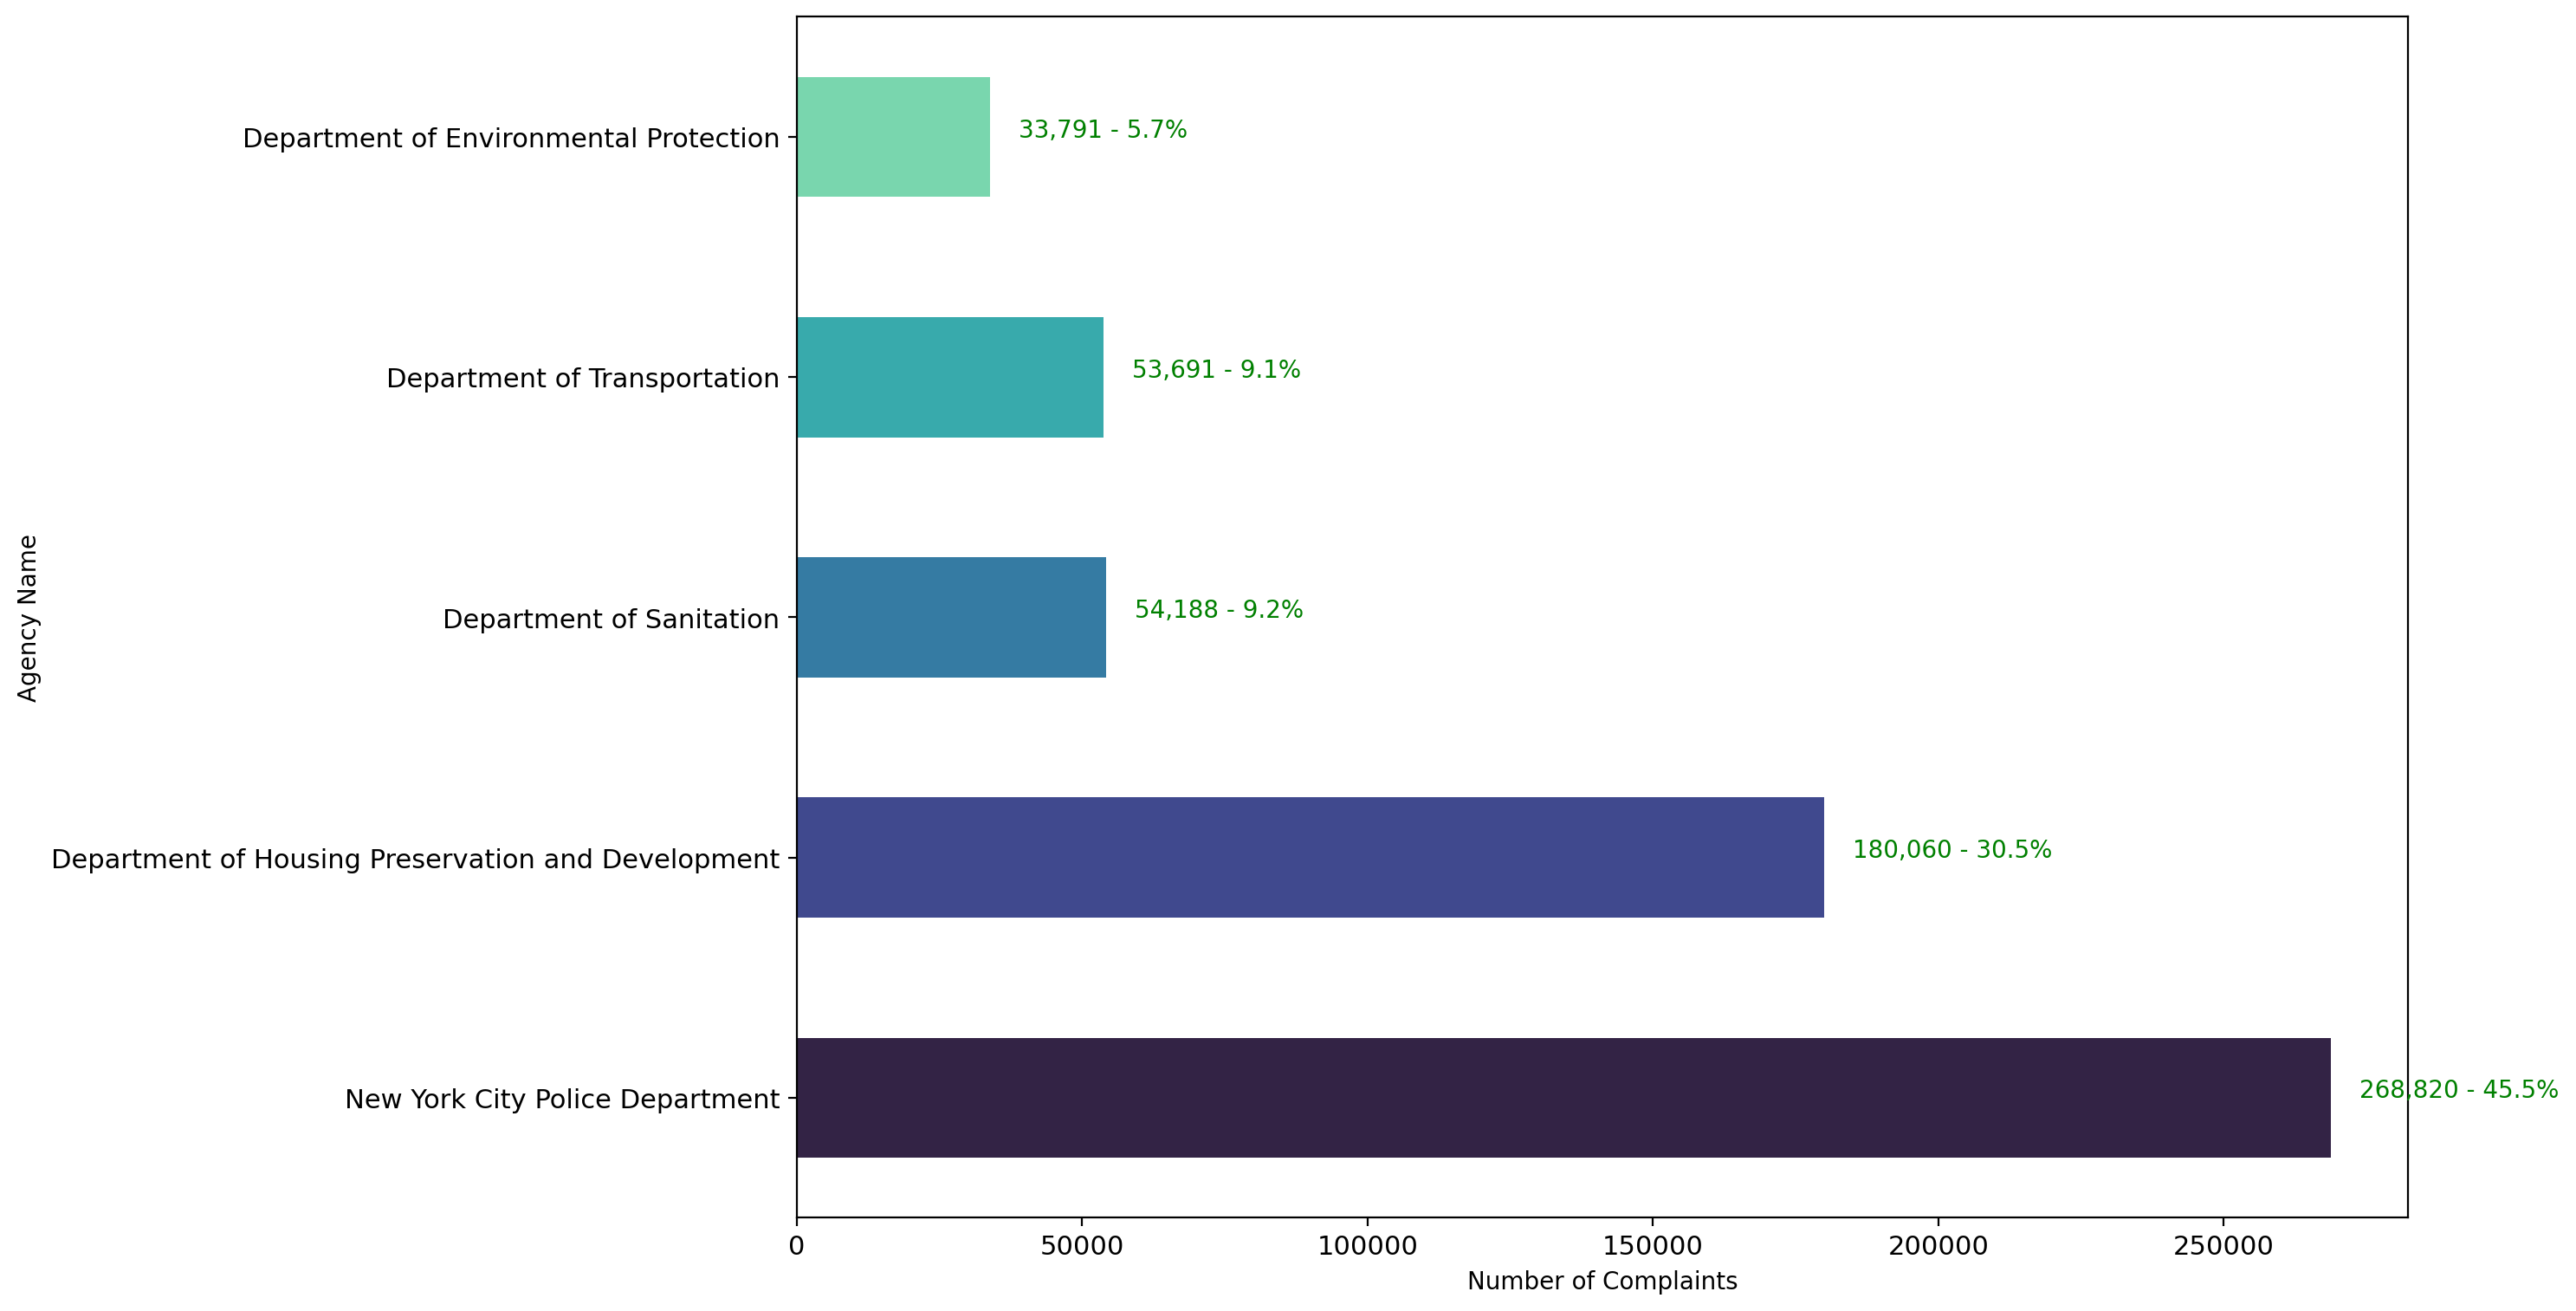

In [7]:
d_agency.plot(kind='barh', figsize=(12, 9), fontsize=11, color=sns.color_palette('mako', len(d_agency)))
plt.xlabel('Number of Complaints', fontsize=10)
plt.ylabel('Agency Name', fontsize=10)

# Includes the number of incidents and the corresponding percentage for every type
for index, value in enumerate(d_agency):
    label = str(format(int(value), ',')) + ' - {}%'.format(round((value/d_agency.sum())*100, 1))
    plt.annotate(label, xy=(value, index), xytext=(value+5000, index), color='green')
    plt.savefig('my_image1.png')

In [8]:
df['Complaint Type'].unique()

array(['Derelict Vehicles', 'Noise - Residential', 'Illegal Parking',
       'Noise - Commercial', 'Obstruction', 'Blocked Driveway',
       'Street Condition', 'Abandoned Vehicle', 'Noise - Street/Sidewalk',
       'Noise - Vehicle', 'Encampment', 'Consumer Complaint',
       'For Hire Vehicle Complaint', 'Rodent',
       'Homeless Person Assistance', 'Maintenance or Facility',
       'Food Poisoning', 'Sidewalk Condition', 'Mobile Food Vendor',
       'Root/Sewer/Sidewalk Condition', 'Traffic Signal Condition',
       'Dead/Dying Tree', 'Dead Animal', 'Animal-Abuse',
       'Noise - Helicopter', 'Panhandling', 'Lost Property',
       'Dirty Condition', 'Residential Disposal Complaint',
       'For Hire Vehicle Report', 'Illegal Fireworks', 'Graffiti',
       'ELECTRIC', 'PLUMBING', 'SAFETY', 'UNSANITARY CONDITION',
       'Water System', 'Drinking', 'Traffic', 'Taxi Complaint',
       'HEAT/HOT WATER', 'Noise - House of Worship',
       'Non-Emergency Police Matter', 'Violation of Pa

In [9]:
df_complaint = df['Complaint Type'].value_counts().head(10)
df_complaint

Illegal Parking            103391
HEAT/HOT WATER              85831
Noise - Residential         61940
Blocked Driveway            36869
UNSANITARY CONDITION        22869
Street Condition            19335
Abandoned Vehicle           14791
PLUMBING                    14765
Noise - Street/Sidewalk     14181
Noise - Helicopter          13420
Name: Complaint Type, dtype: int64

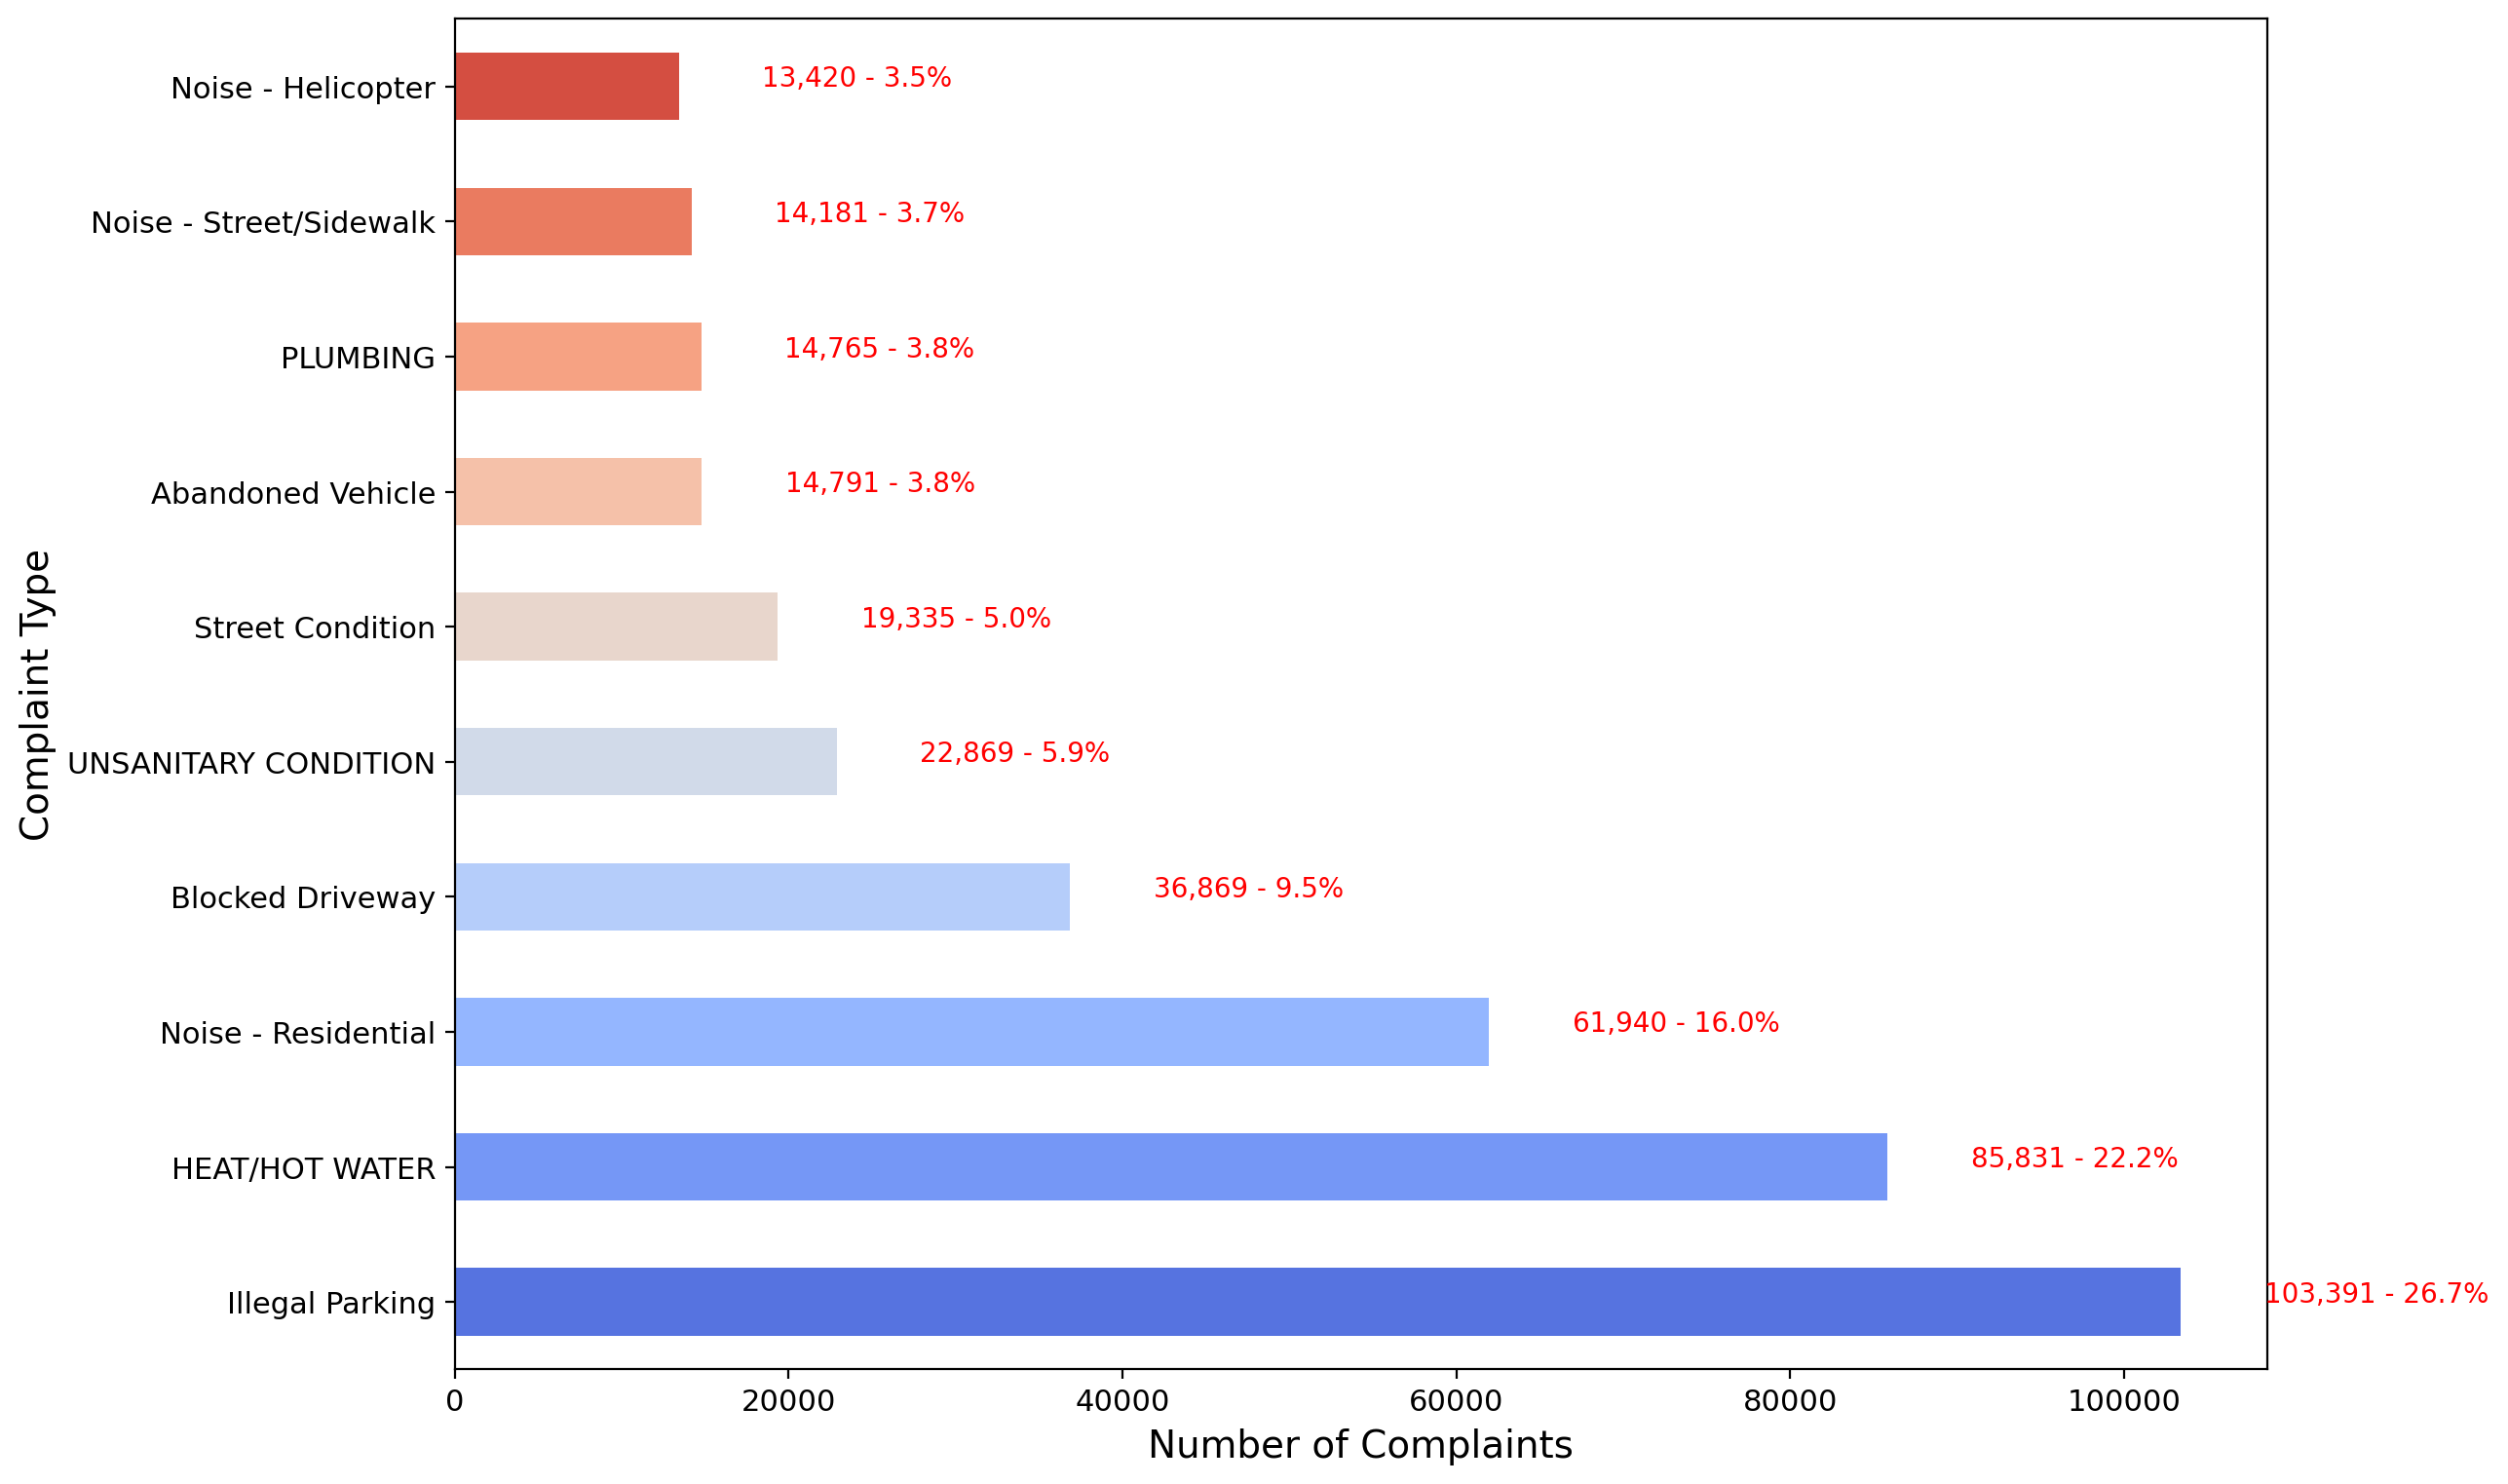

In [10]:
df_complaint.plot(kind='barh', figsize=(12, 9), fontsize=11, color=sns.color_palette('coolwarm', len(df_complaint)))
plt.xlabel('Number of Complaints', fontsize=14)
plt.ylabel('Complaint Type', fontsize=14)

# Includes the number of incidents and the corresponding percentage for every type
for index, value in enumerate(df_complaint):
    label = str(format(int(value), ',')) + ' - {}%'.format(round((value/df_complaint.sum())*100, 1))
    plt.annotate(label, xy=(value, index), xytext=(value+5000, index), color='red')
    plt.savefig('my_image.png')

The most complaint type is Illegal parking, lets check the area of illegal parking

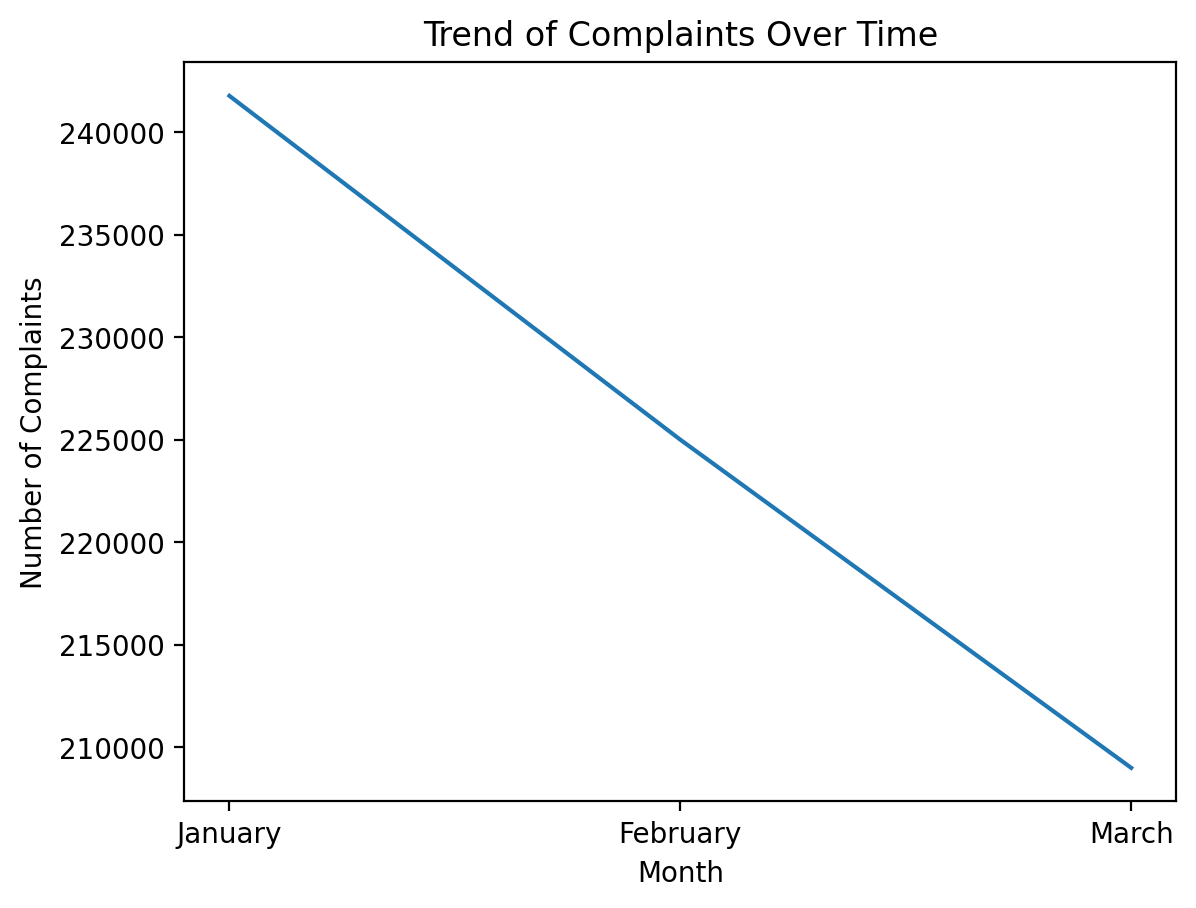

<Figure size 640x480 with 0 Axes>

In [11]:
df['Created Date'] = pd.to_datetime(df['Created Date'])
monthly_complaints = df.groupby(pd.Grouper(key='Created Date', freq='M')).size()

# Format the index as month names
monthly_complaints.index = monthly_complaints.index.strftime('%B')

plt.plot(monthly_complaints.index, monthly_complaints.values)
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.title('Trend of Complaints Over Time')
plt.show()
plt.savefig('my_image2.png')


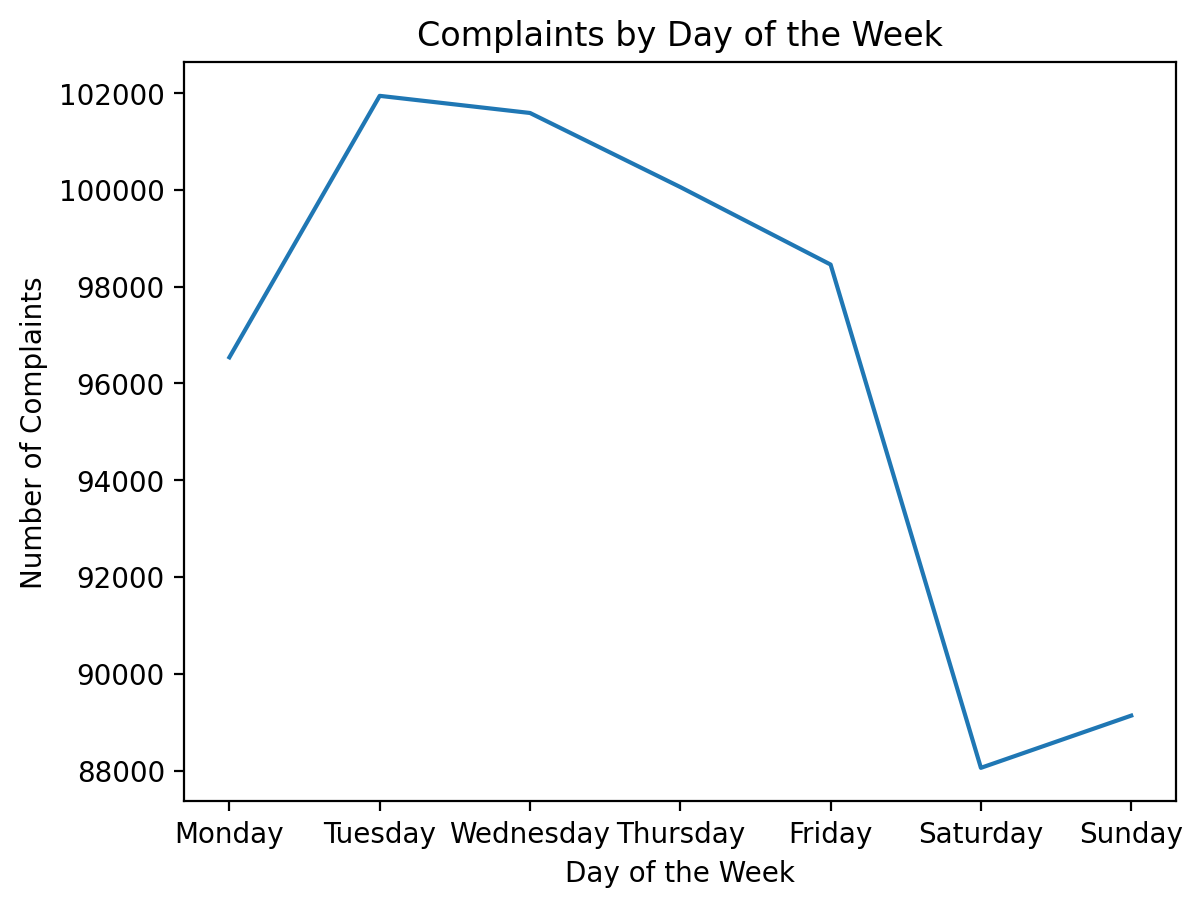

<Figure size 640x480 with 0 Axes>

In [12]:


# Convert 'Created Date' column to datetime format
df['Created Date'] = pd.to_datetime(df['Created Date'])

# Get the count of complaints by day of the week
day_of_week_complaints = df.groupby(df['Created Date'].dt.dayofweek).size()

# Plot the data
plt.plot(day_of_week_complaints.index, day_of_week_complaints.values)
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of the Week')
plt.ylabel('Number of Complaints')
plt.title('Complaints by Day of the Week')
plt.show()
plt.savefig('my_image3.png')

In [13]:
df_area = df[['Park Borough', 'Incident Zip', 'Street Name', 'Latitude', 'Longitude', 'Complaint Type']]
df_area = df_area[df_area['Complaint Type'] == 'Illegal Parking']

df_area.head()

Park Borough Incident Zip          Street Name   Latitude  Longitude  \
9      BROOKLYN      11230.0             AVENUE O  40.611655 -73.970985   
16     BROOKLYN      11204.0            21 AVENUE  40.612777 -73.986187   
21     BROOKLYN      11206.0        THROOP AVENUE  40.698135 -73.943943   
23       QUEENS      11423.0           185 STREET  40.711038 -73.774956   
26        BRONX      10472.0  COMMONWEALTH AVENUE  40.829030 -73.867600   

     Complaint Type  
9   Illegal Parking  
16  Illegal Parking  
21  Illegal Parking  
23  Illegal Parking  
26  Illegal Parking

In [14]:
df_area = df_area[df_area['Park Borough'] != 'Unspecified']
df_area['Park Borough'].value_counts()

BROOKLYN         40125
QUEENS           30684
BRONX            17227
MANHATTAN        12531
STATEN ISLAND     2671
Name: Park Borough, dtype: int64

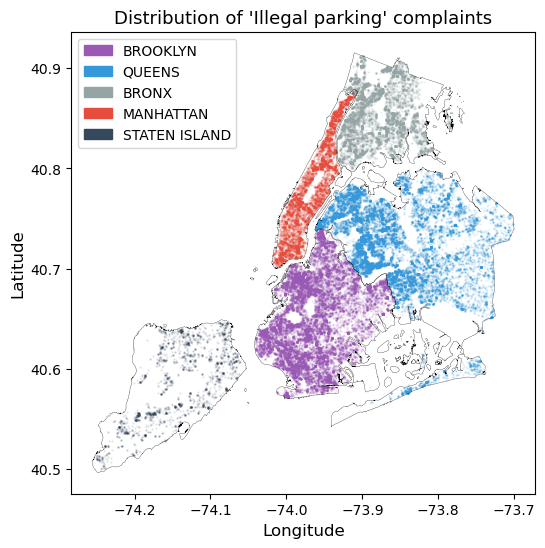

In [15]:
import geopandas as gpd

boroughs = list(df_area['Park Borough'].value_counts().index)
colors = ['#9b59b6', '#3498db', '#95a5a6', '#e74c3c', '#34495e', '#2ecc71']
patches = []

fig, ax = plt.subplots(figsize=(6,6))

for index, value in enumerate(boroughs):
    borough_df = df_area[df_area['Park Borough'] == value]
    borough_gdf = gpd.GeoDataFrame(borough_df, geometry=gpd.points_from_xy(borough_df['Longitude'], borough_df['Latitude']))
    borough_gdf.plot(ax=ax, color=colors[index], markersize=0.5, alpha=0.1)
    patches.append(mpatches.Patch(label=value, color=colors[index]))
borough_map['geometry'].boundary.plot(edgecolor = 'black', linewidth = 0.2, ax = ax)
plt.title("Distribution of 'Illegal parking' complaints", size=13)
plt.xlabel('Longitude', size=12)
plt.ylabel('Latitude', size=12)
plt.legend(handles=patches);
plt.savefig('my_image5.png')

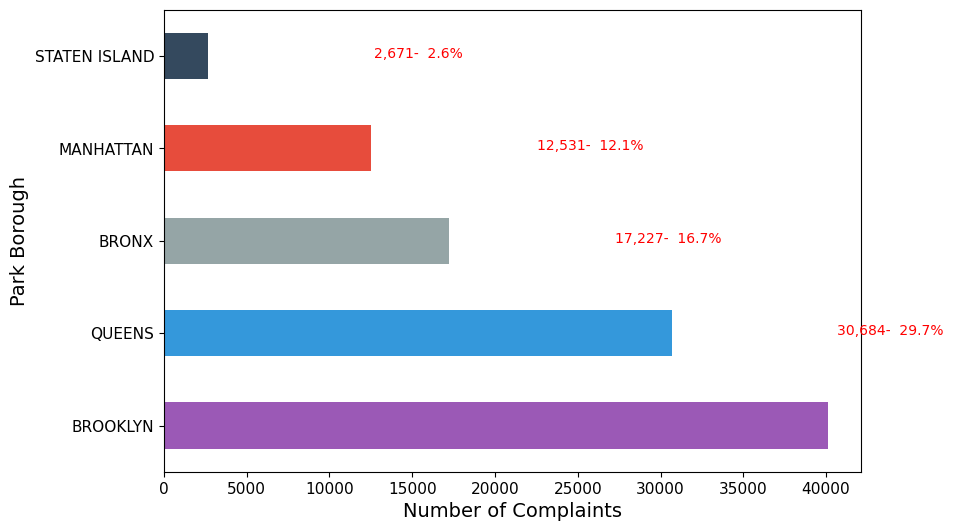

In [59]:
colors = ['#9b59b6', '#3498db', '#95a5a6', '#e74c3c', '#34495e', '#2ecc71']
ny_borough = df_area['Park Borough'].value_counts()

ny_borough.plot(kind = 'barh', figsize = (9, 6), fontsize = 11, color = colors)
plt.ylabel('Park Borough', fontsize = 14)
plt.xlabel('Number of Complaints', fontsize = 14)

for index, value in enumerate(ny_borough):   
    label = str(format(int(value), ',')) + '-  {}%'.format(round( (value/ny_borough.sum())*100, 1)) 
    plt.annotate(label, xy = (value + 10000, index - 0.02), color = 'red')
    plt.savefig('my_image6.png')

In [49]:
df_noise = df[['Park Borough', 'Incident Zip', 'Street Name', 'Latitude', 'Longitude', 'Complaint Type']]
df_noise = df_noise[df_noise['Complaint Type'] == 'Noise - Residential']

df_noise.head()
df_noise = df_noise[df_noise['Park Borough'] != 'Unspecified']
df_noise['Park Borough'].value_counts()

BROOKLYN         17347
BRONX            17214
MANHATTAN        14319
QUEENS           11475
STATEN ISLAND     1516
Name: Park Borough, dtype: int64

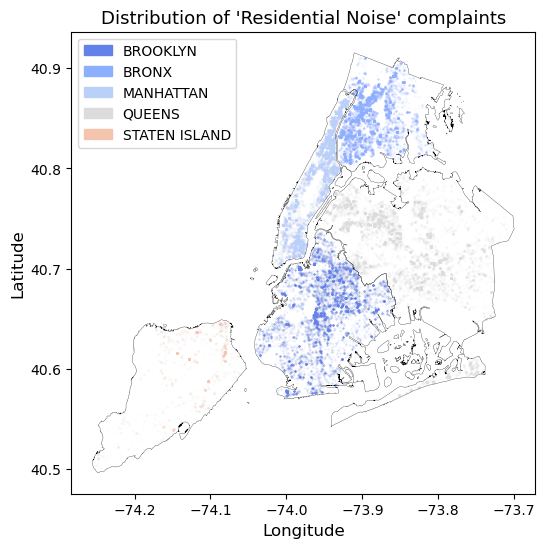

In [55]:
import geopandas as gpd

boroughs = list(df_noise['Park Borough'].value_counts().index)
colors = sns.color_palette('coolwarm', 7)
patches = []

fig, ax = plt.subplots(figsize = (6, 6))

for index, value in enumerate(boroughs):
    borough_df = df_noise[df_noise['Park Borough'] == value]
    ax.scatter(borough_df['Longitude'], borough_df['Latitude'], c = colors[index], s = 0.5, alpha = 0.1, marker = '.')
    patches.append(mpatches.Patch(label = value, color = colors[index]))
 
borough_map['geometry'].boundary.plot(edgecolor = 'black', linewidth = 0.2, ax = ax)

plt.title("Distribution of 'Residential Noise' complaints", size = 13)
plt.xlabel('Longitude', size = 12)
plt.ylabel('Latitude', size = 12)
plt.legend(patches, boroughs);

plt.savefig('my_image7.png')

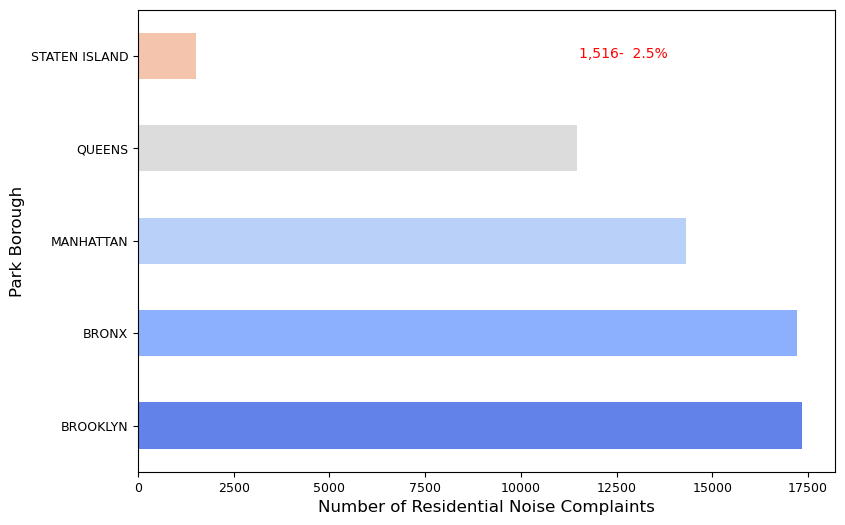

In [79]:
colors = sns.color_palette('coolwarm', 7)
ny_borough = df_noise['Park Borough'].value_counts()

ny_borough.plot(kind = 'barh', figsize = (9, 6), fontsize = 9, color = colors)
plt.ylabel('Park Borough', fontsize = 12)
plt.xlabel('Number of Residential Noise Complaints', fontsize = 12)
for index, value in enumerate(ny_borough):   
    label = str(format(int(value), ',')) + '-  {}%'.format(round( (value/ny_borough.sum())*100, 1)) 
    plt.annotate(label, xy = (value + 10000, index - 0.02), color = 'red')
    plt.savefig('my_image8.png')

   

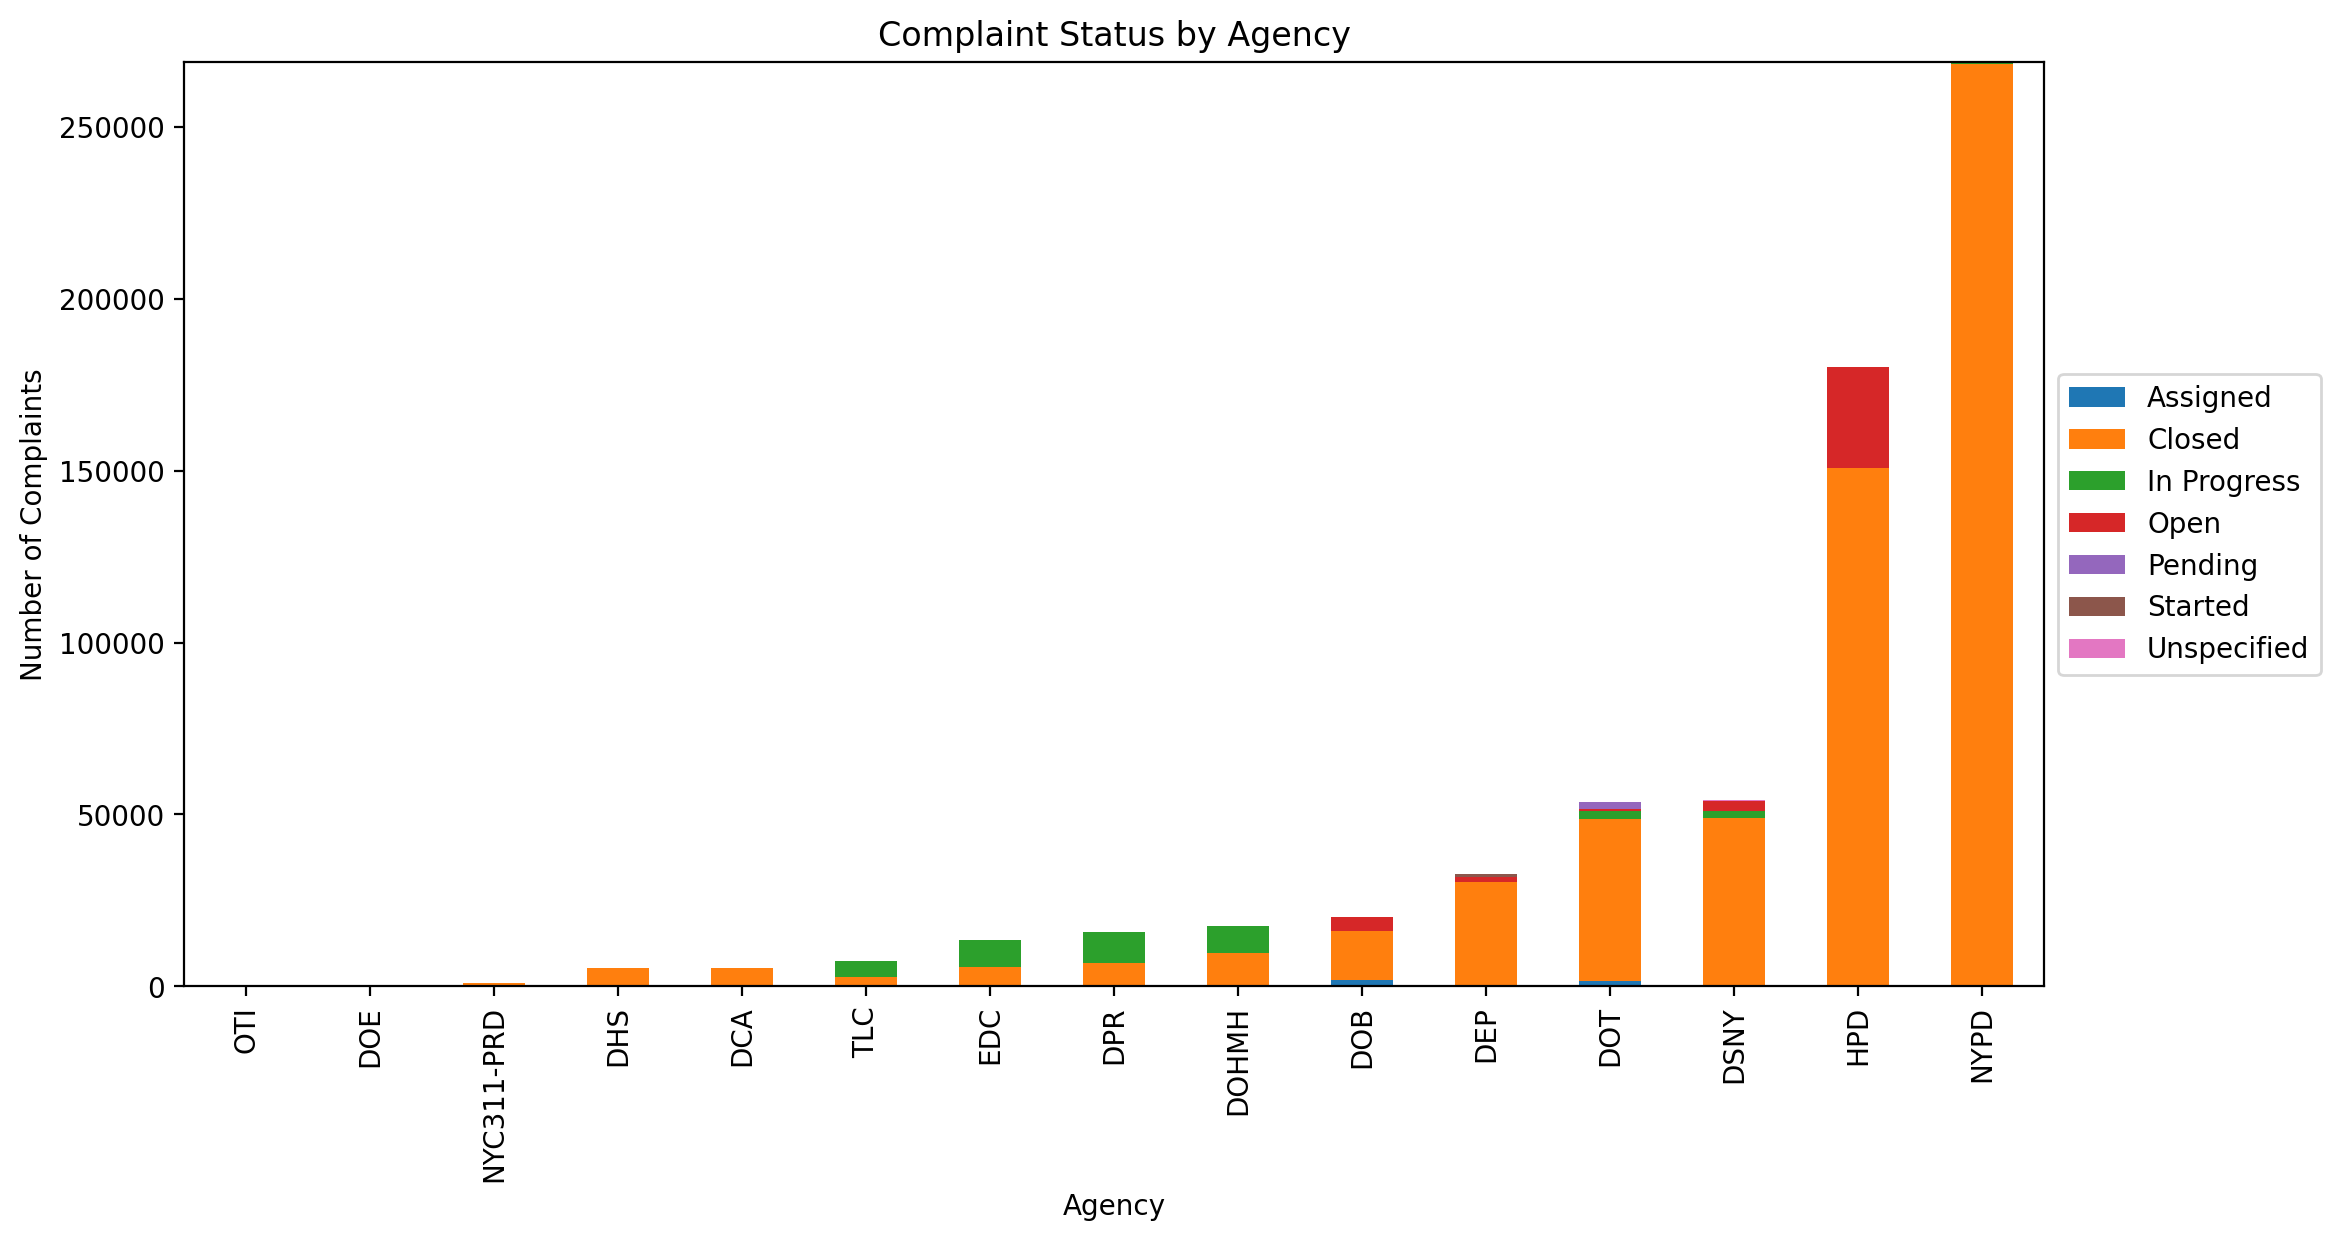

<Figure size 640x480 with 0 Axes>

In [44]:
# Group the data by Agency and Status
grouped_data = df.groupby(['Agency', 'Status']).size().unstack(fill_value=0)

# Sort the data in ascending order by the total number of complaints for each agency
grouped_data = grouped_data.loc[grouped_data.sum(axis=1).sort_values().index]

# Create the stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(12,6))

# Set the chart title and labels
ax.set_title('Complaint Status by Agency')
ax.set_xlabel('Agency')
ax.set_ylabel('Number of Complaints')

# Draw the legend on the left side of the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the chart
plt.show()
plt.savefig('my_image9.png')

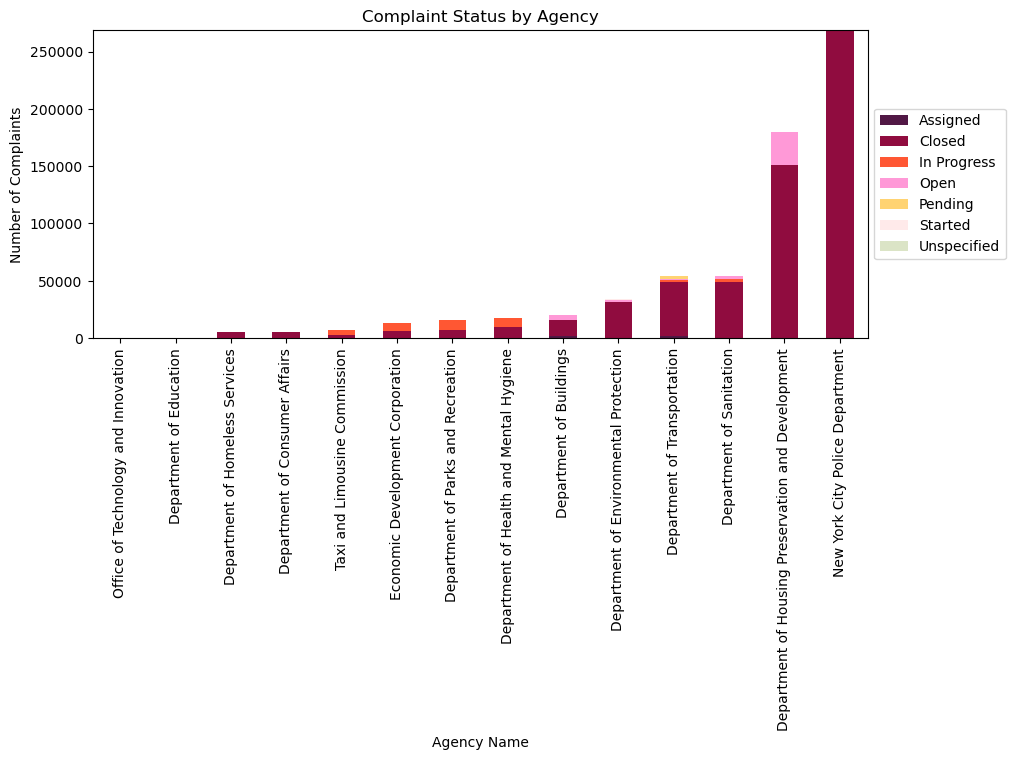

<Figure size 640x480 with 0 Axes>

In [22]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt



# Group the data by Agency and Status
grouped_data = df.groupby(['Agency Name', 'Status']).size().unstack(fill_value=0)

# Sort the data in ascending order by the total number of complaints for each agency
grouped_data = grouped_data.loc[grouped_data.sum(axis=1).sort_values().index]

# Define some colors for the chart
colors = ['#511845', '#900C3F', '#FF5733','#FF99D7','#FFD372','#FFEAEA','#DBE4C6']

# Create the stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10,4), color=colors)

# Set the chart title and labels
ax.set_title('Complaint Status by Agency')
ax.set_xlabel('Agency Name')
ax.set_ylabel('Number of Complaints')

# Draw the legend on the left side of the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the chart
plt.show()
plt.savefig('my_image10.png')


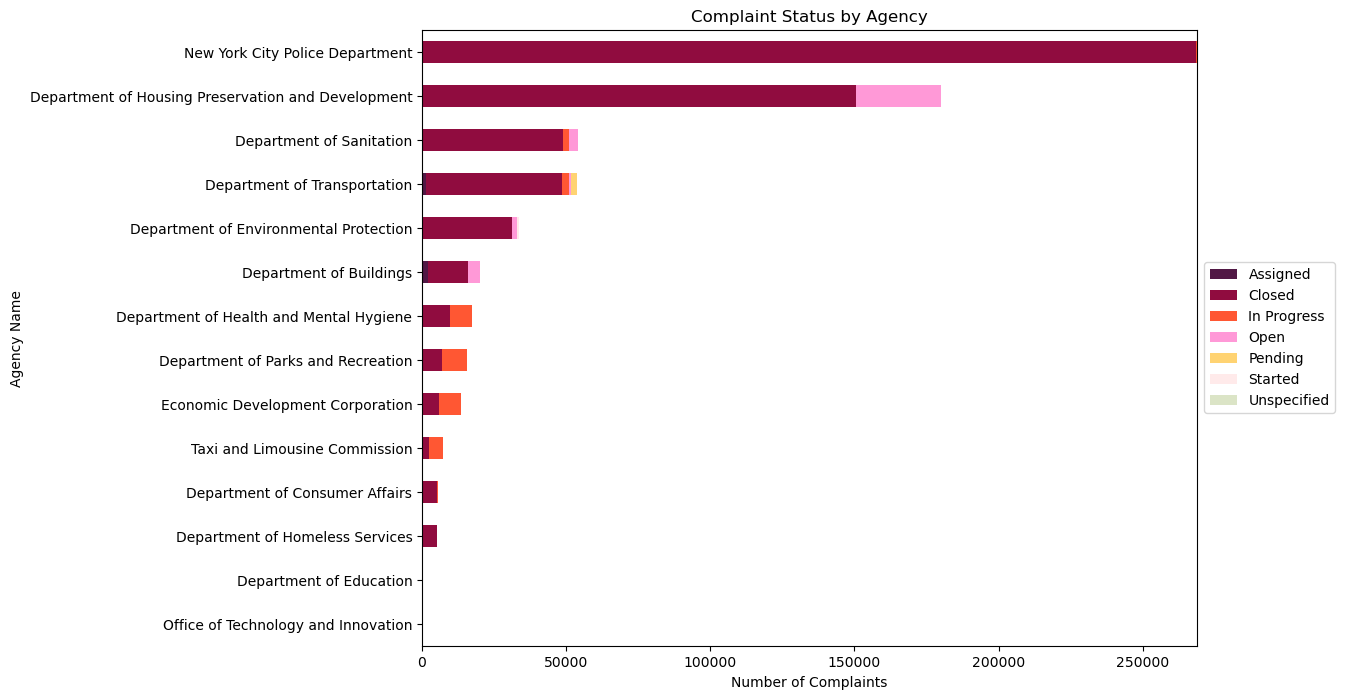

<Figure size 640x480 with 0 Axes>

In [93]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

grouped_data = df.groupby(['Agency Name', 'Status']).size().unstack(fill_value=0)

grouped_data = grouped_data.loc[grouped_data.sum(axis=1).sort_values().index]

colors = ['#511845', '#900C3F', '#FF5733','#FF99D7','#FFD372','#FFEAEA','#DBE4C6']

ax = grouped_data.plot(kind='barh', stacked=True, figsize=(10,8), color=colors)

ax.set_title('Complaint Status by Agency')
ax.set_xlabel('Number of Complaints')
ax.set_ylabel('Agency Name')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

plt.savefig('my_image11.png')



In [ ]:

#Load shapefile with zip code boundaries
zip_shapes = gpd.read_file('path/to/zip_shapefile.shp')

# Merge zip code shapes with complaint data
gdf = zip_shapes.merge(df, on='Incident Zip')

# Create thematic map
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='Complaint Type', cmap='viridis', ax=ax, legend=True)
ax.set_title('Thematic Map of Complaints by Zip Code')
plt.show()

In [93]:
df.dropna(subset=['Location'], inplace=True)

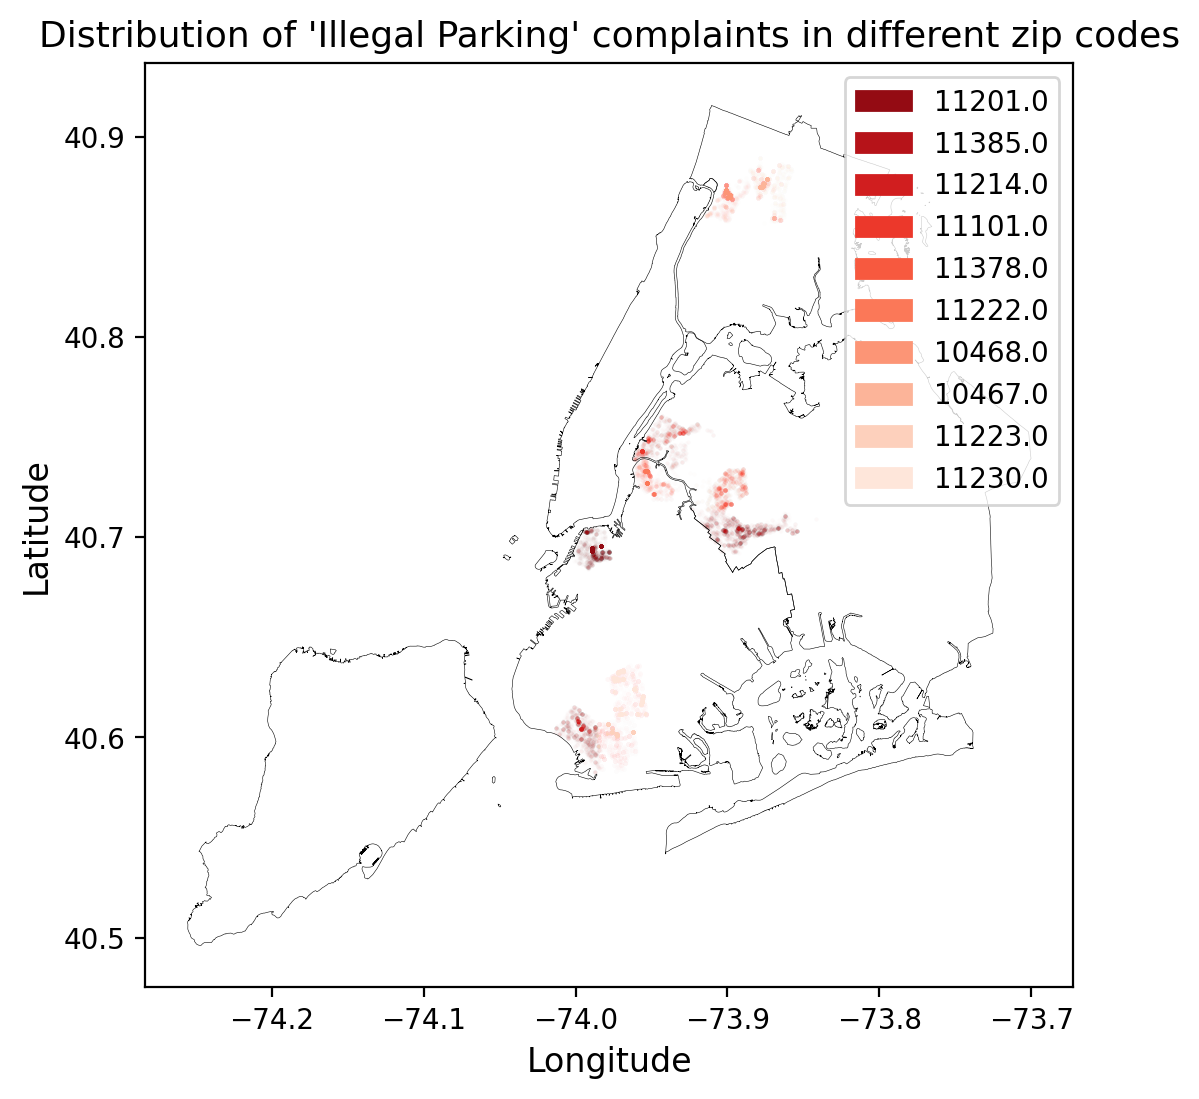

In [103]:
zip_codes = list(df_area['Incident Zip'].value_counts().head(10).index)
colors = sns.color_palette('Reds_r', len(zip_codes)).as_hex()
patches = []

fig, ax = plt.subplots(figsize = (6, 6))

for index, value in enumerate(zip_codes):
    zip_df = df_area[df_area['Incident Zip'] == value]
    ax.scatter(zip_df['Longitude'], zip_df['Latitude'], c = colors[index], s = 1, alpha = 0.01, marker = '.')
    patches.append(mpatches.Patch(label = value, color = colors[index]))
    
borough_map['geometry'].boundary.plot(edgecolor = 'black', linewidth = 0.2, ax = ax)
    
plt.title("Distribution of 'Illegal Parking' complaints in different zip codes", size = 13)
plt.xlabel('Longitude', size = 12)
plt.ylabel('Latitude', size = 12)

plt.legend(patches, zip_codes);

plt.savefig('my_image12.png')

In [141]:
df_street= df[['Park Borough', 'Incident Zip','Incident Address', 'Street Name', 'Latitude', 'Longitude', 'Complaint Type','Location','Agency Name','Agency']]
d2 = df_street['Complaint Type']

d2.head()

0    Derelict Vehicles
1    Derelict Vehicles
2    Derelict Vehicles
3    Derelict Vehicles
4    Derelict Vehicles
Name: Complaint Type, dtype: object

In [149]:
d2 = df_street[df_street['Street Name'] != 'Unspecified']
d3 = d2['Street Name'].value_counts().head(10)
d3

BROADWAY              7476
GRAND CONCOURSE       4312
5 AVENUE              3588
PARSONS BOULEVARD     3304
7 AVENUE              2950
AMSTERDAM AVENUE      2834
3 AVENUE              2789
8 AVENUE              2719
OCEAN AVENUE          2561
ST NICHOLAS AVENUE    2419
Name: Street Name, dtype: int64

In [30]:
df_all_complaints= df[['Park Borough', 'Incident Zip', 'Street Name', 'Latitude', 'Longitude', 'Complaint Type','Location','Agency Name','Agency']]
d1 = df_all_complaints['Complaint Type']

d1.head()

0    Derelict Vehicles
1    Derelict Vehicles
2    Derelict Vehicles
3    Derelict Vehicles
4    Derelict Vehicles
Name: Complaint Type, dtype: object

In [31]:
d1 = df_all_complaints[df_all_complaints['Park Borough'] != 'Unspecified']
d1['Park Borough'].value_counts()

BROOKLYN         208825
QUEENS           155515
BRONX            142558
MANHATTAN        139347
STATEN ISLAND     28457
Name: Park Borough, dtype: int64

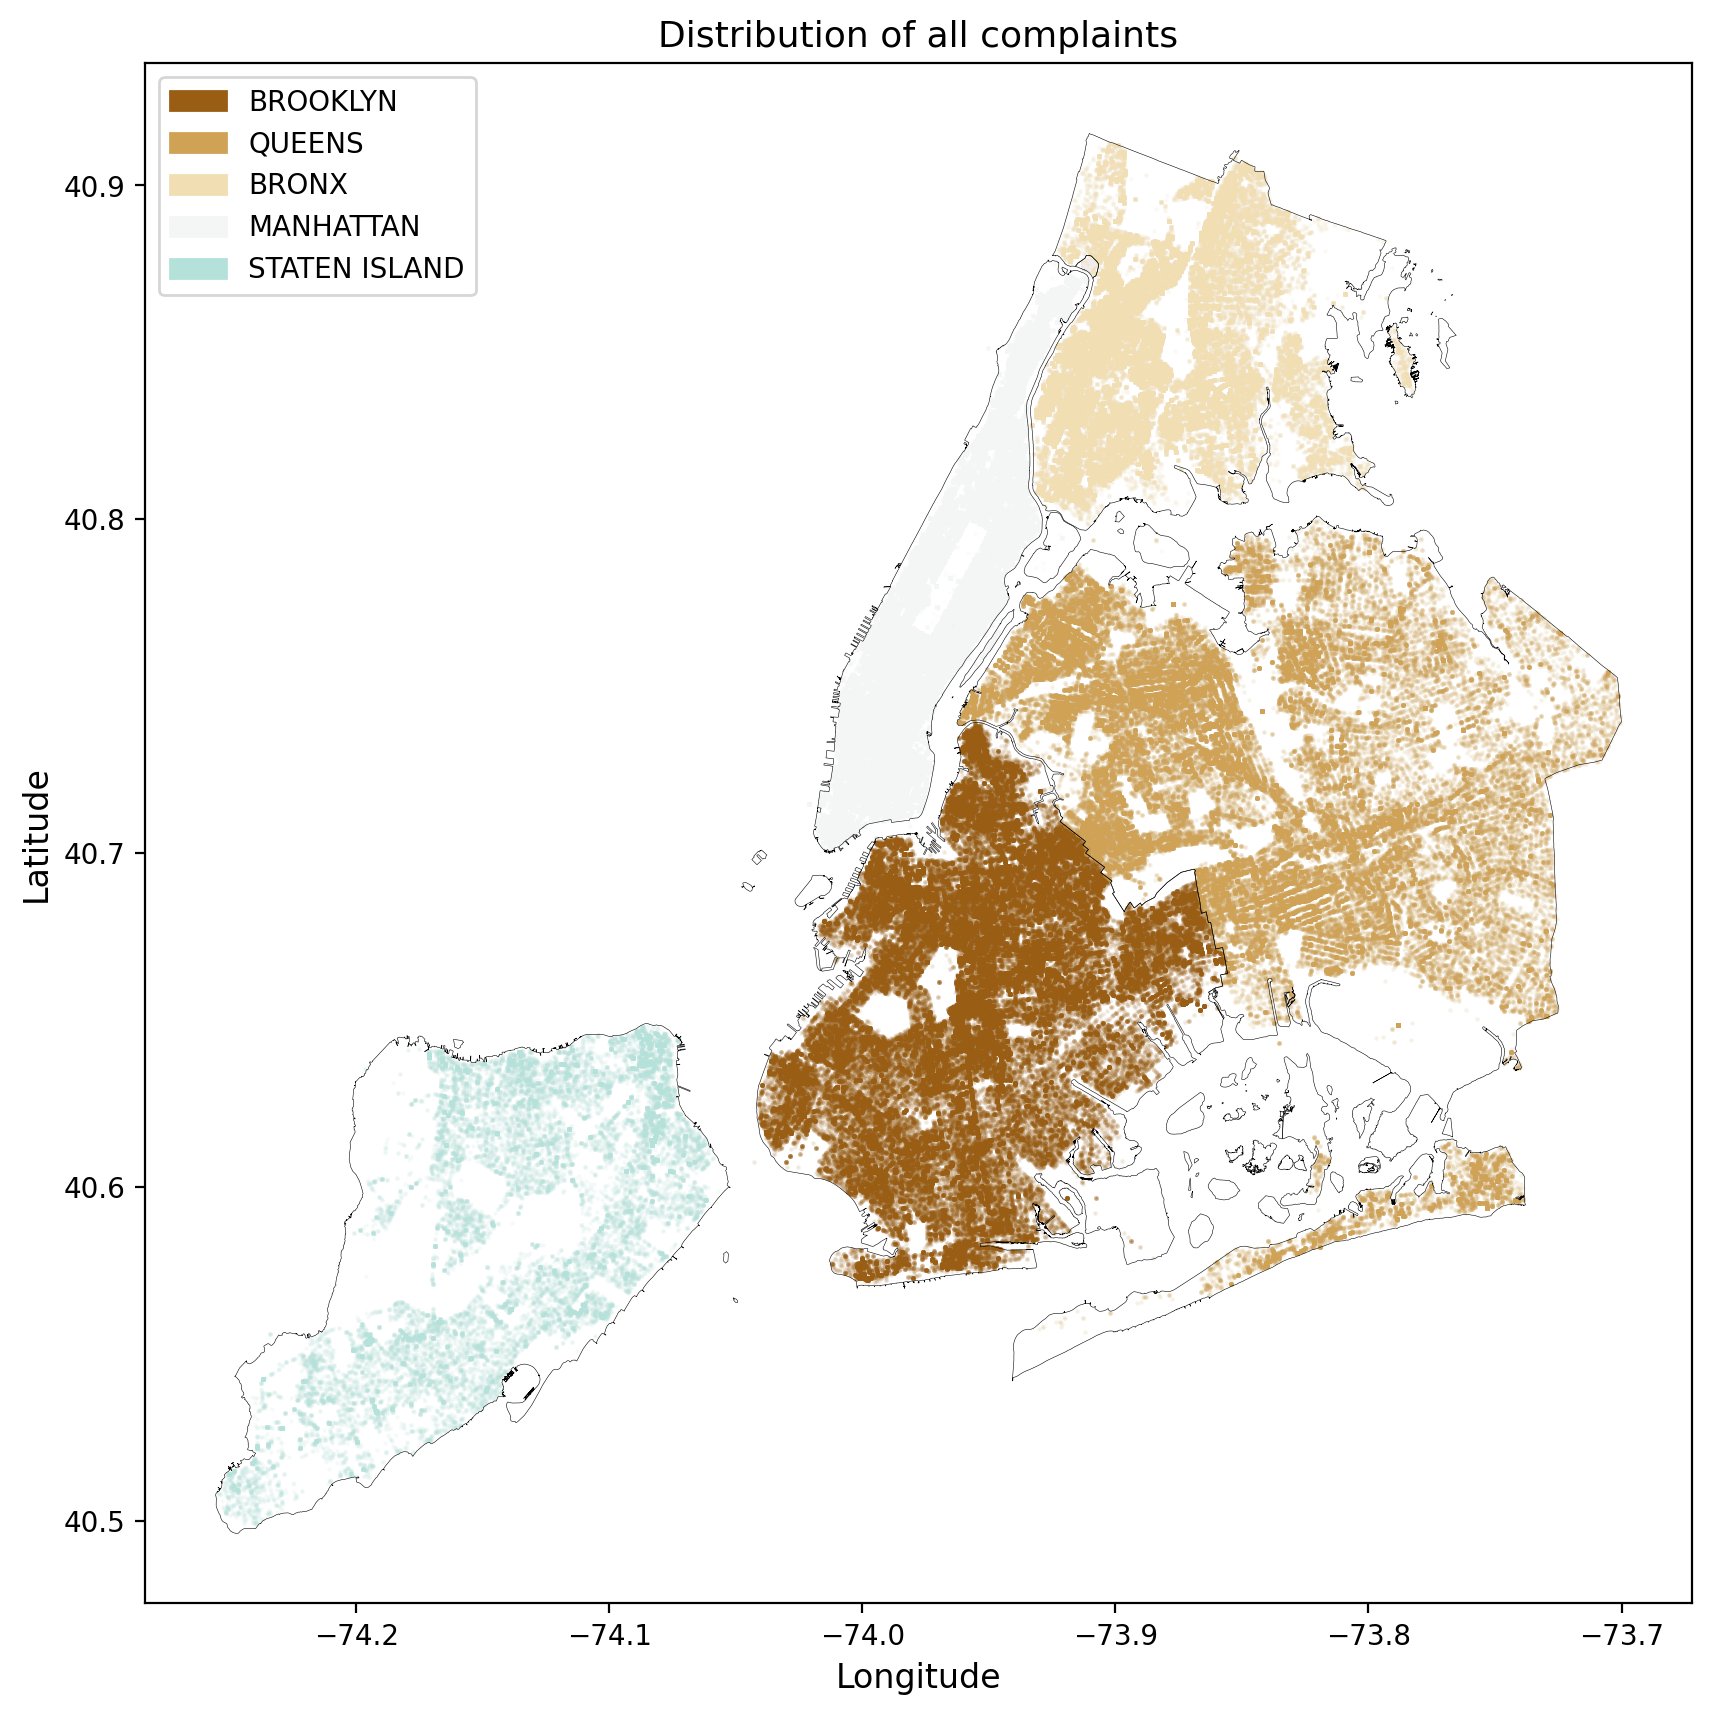

In [129]:
boroughs = list(d1['Park Borough'].value_counts().index)
colors = sns.color_palette('BrBG', 7)
patches = []

fig, ax = plt.subplots(figsize=(10,10))

for index, value in enumerate(boroughs):
    borough_df = d1[d1['Park Borough'] == value]
    borough_gdf = gpd.GeoDataFrame(borough_df, geometry=gpd.points_from_xy(borough_df['Longitude'], borough_df['Latitude']))
    borough_gdf.plot(ax=ax, color=colors[index], markersize=0.5, alpha=0.1)
    patches.append(mpatches.Patch(label=value, color=colors[index]))
borough_map['geometry'].boundary.plot(edgecolor = 'black', linewidth = 0.2, ax = ax)
plt.title("Distribution of all complaints", size=13)
plt.xlabel('Longitude', size=12)
plt.ylabel('Latitude', size=12)
plt.legend(handles=patches);
plt.savefig('my_image13.png')

In [62]:
df_column = df[['Park Borough', 'Incident Zip', 'Street Name', 'Latitude', 'Longitude', 'Complaint Type','Location','Agency Name','Agency']]
df_secondarea = df_column[df_column['Complaint Type'] == 'HEAT/HOT WATER']

df_secondarea.head()

Park Borough Incident Zip           Street Name   Latitude  Longitude  \
419     BROOKLYN      11208.0        MILFORD STREET  40.675250 -73.877253   
433        BRONX      10472.0      STRATFORD AVENUE  40.827966 -73.875222   
461       QUEENS      11369.0            107 STREET  40.758786 -73.862097   
462    MANHATTAN      10032.0  FT WASHINGTON AVENUE  40.836858 -73.944372   
484       QUEENS      11418.0            102 STREET  40.692928 -73.844297   

     Complaint Type                                  Location  \
419  HEAT/HOT WATER   (40.67524991029645, -73.87725305090953)   
433  HEAT/HOT WATER   (40.82796556147396, -73.87522245020149)   
461  HEAT/HOT WATER  (40.758786085123674, -73.86209745061683)   
462  HEAT/HOT WATER   (40.83685762502109, -73.94437168375892)   
484  HEAT/HOT WATER  (40.692927560917795, -73.84429705077777)   

                                           Agency Name Agency  
419  Department of Housing Preservation and Develop...    HPD  
433  Department of Housing Preservation and Develop...    HPD  
461  Department of Housing Preservation and Develop...    HPD  
462  Department of Housing Preservation and Develop...    HPD  
484  Department of Housing Preservation and Develop...    HPD

In [75]:
df_secondarea = df_column[df_column['Park Borough'] != 'Unspecified']
df_secondarea['Park Borough'].value_counts()

BROOKLYN         208825
QUEENS           155515
BRONX            142558
MANHATTAN        139347
STATEN ISLAND     28457
Name: Park Borough, dtype: int64

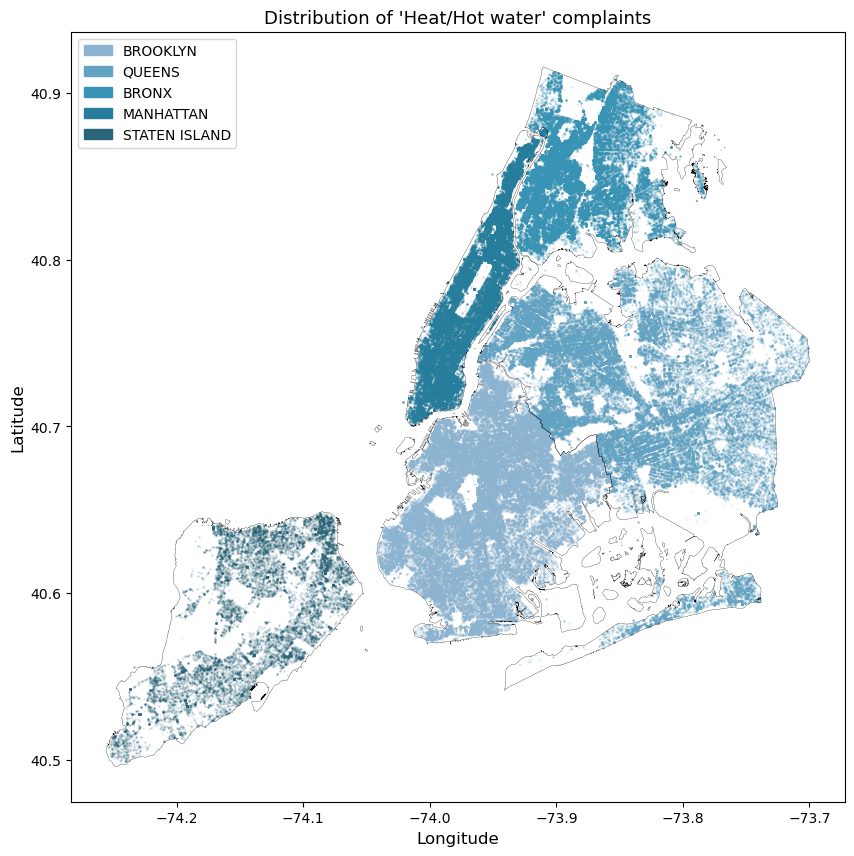

In [76]:

boroughs = list(df_secondarea['Park Borough'].value_counts().index)
colors = sns.color_palette('PuBuGn_d')
patches = []

fig, ax = plt.subplots(figsize=(10,10))

for index, value in enumerate(boroughs):
    borough_df = df_secondarea[df_secondarea['Park Borough'] == value]
    borough_gdf = gpd.GeoDataFrame(borough_df, geometry=gpd.points_from_xy(borough_df['Longitude'], borough_df['Latitude']))
    borough_gdf.plot(ax=ax, color=colors[index], markersize=0.5, alpha=0.1)
    patches.append(mpatches.Patch(label=value, color=colors[index]))
borough_map['geometry'].boundary.plot(edgecolor = 'black', linewidth = 0.2, ax = ax)
plt.title("Distribution of 'Heat/Hot water' complaints", size=13)
plt.xlabel('Longitude', size=12)
plt.ylabel('Latitude', size=12)
plt.legend(handles=patches);
plt.savefig('my_image14.png')


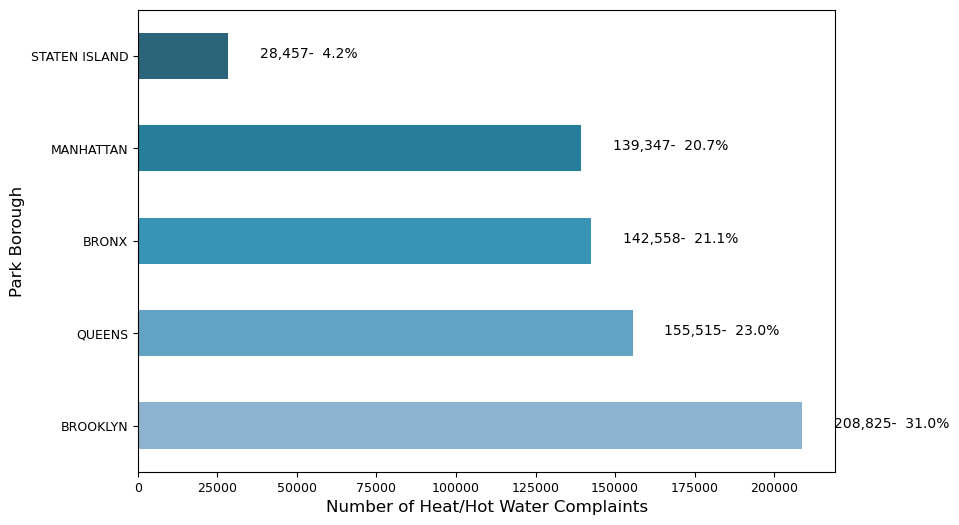

In [74]:
colors = sns.color_palette('PuBuGn_d')
ny_borough = df_secondarea['Park Borough'].value_counts()

ny_borough.plot(kind = 'barh', figsize = (9, 6), fontsize = 9, color = colors)
plt.ylabel('Park Borough', fontsize = 12)
plt.xlabel('Number of Heat/Hot Water Complaints', fontsize = 12)

for index, value in enumerate(ny_borough):   
    label = str(format(int(value), ',')) + '-  {}%'.format(round( (value/ny_borough.sum())*100, 1)) 
    plt.annotate(label, xy = (value + 10000, index - 0.02), color = 'black')
    plt.savefig('my_image15.png')

In [116]:
# Extract the relevant columns
complaints = df[['Created Date', 'Closed Date', 'Complaint Type']]
complaints.head(2)

Created Date Closed Date     Complaint Type
0 2023-03-27 12:00:00         NaN  Derelict Vehicles
1 2023-03-27 12:00:00         NaN  Derelict Vehicles

In [123]:
# Set the action date
action_date = '2023-03-01'

# Convert the date columns to datetime format
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

# Calculate the number of complaints before and after the action date
before_action = df[df['Created Date'] < action_date].shape[0]
after_action = df[df['Closed Date'] >= action_date].shape[0]


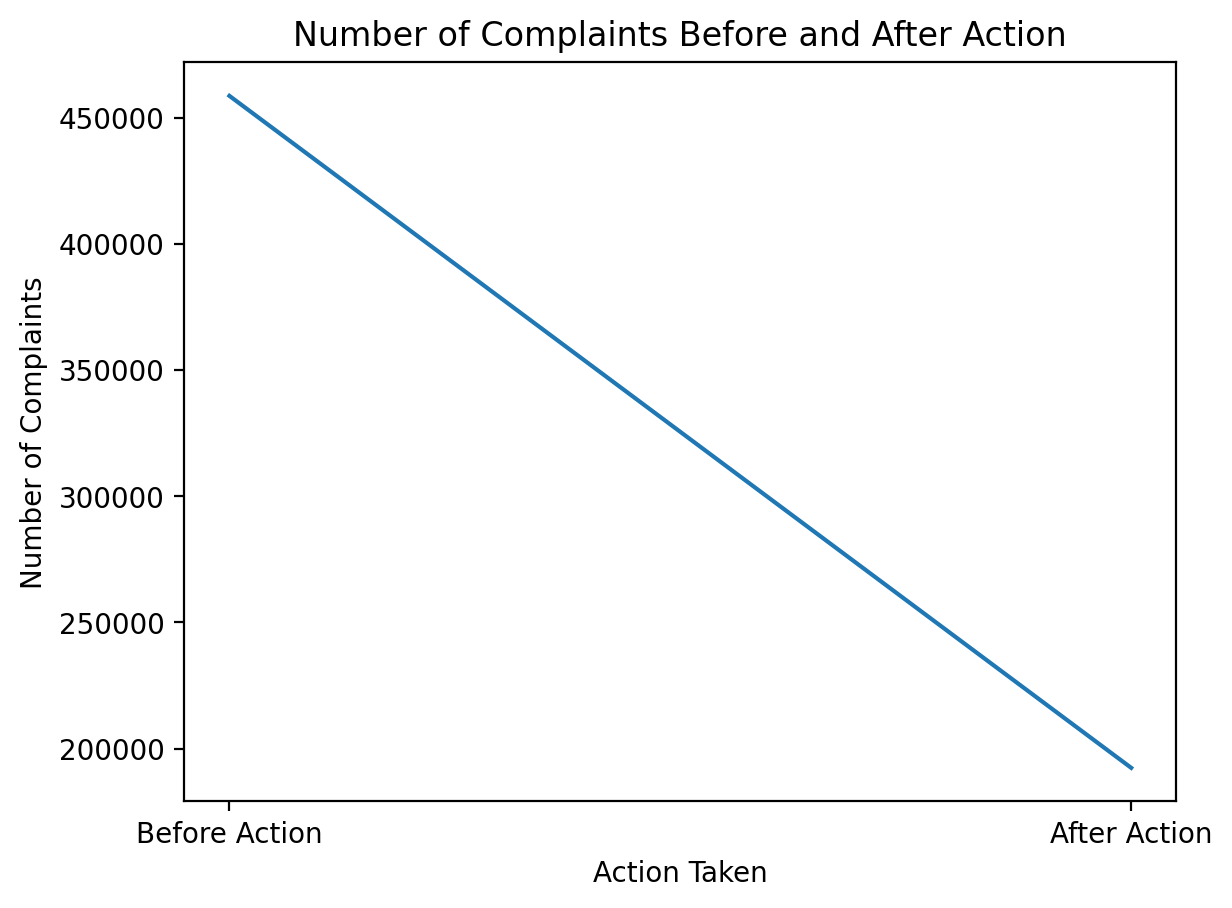

<Figure size 640x480 with 0 Axes>

In [125]:
# Create the line chart
plt.plot(['Before Action', 'After Action'], [before_action, after_action])
plt.title('Number of Complaints Before and After Action')
plt.xlabel('Action Taken')
plt.ylabel('Number of Complaints')
plt.show()
plt.savefig('my_image16.png')

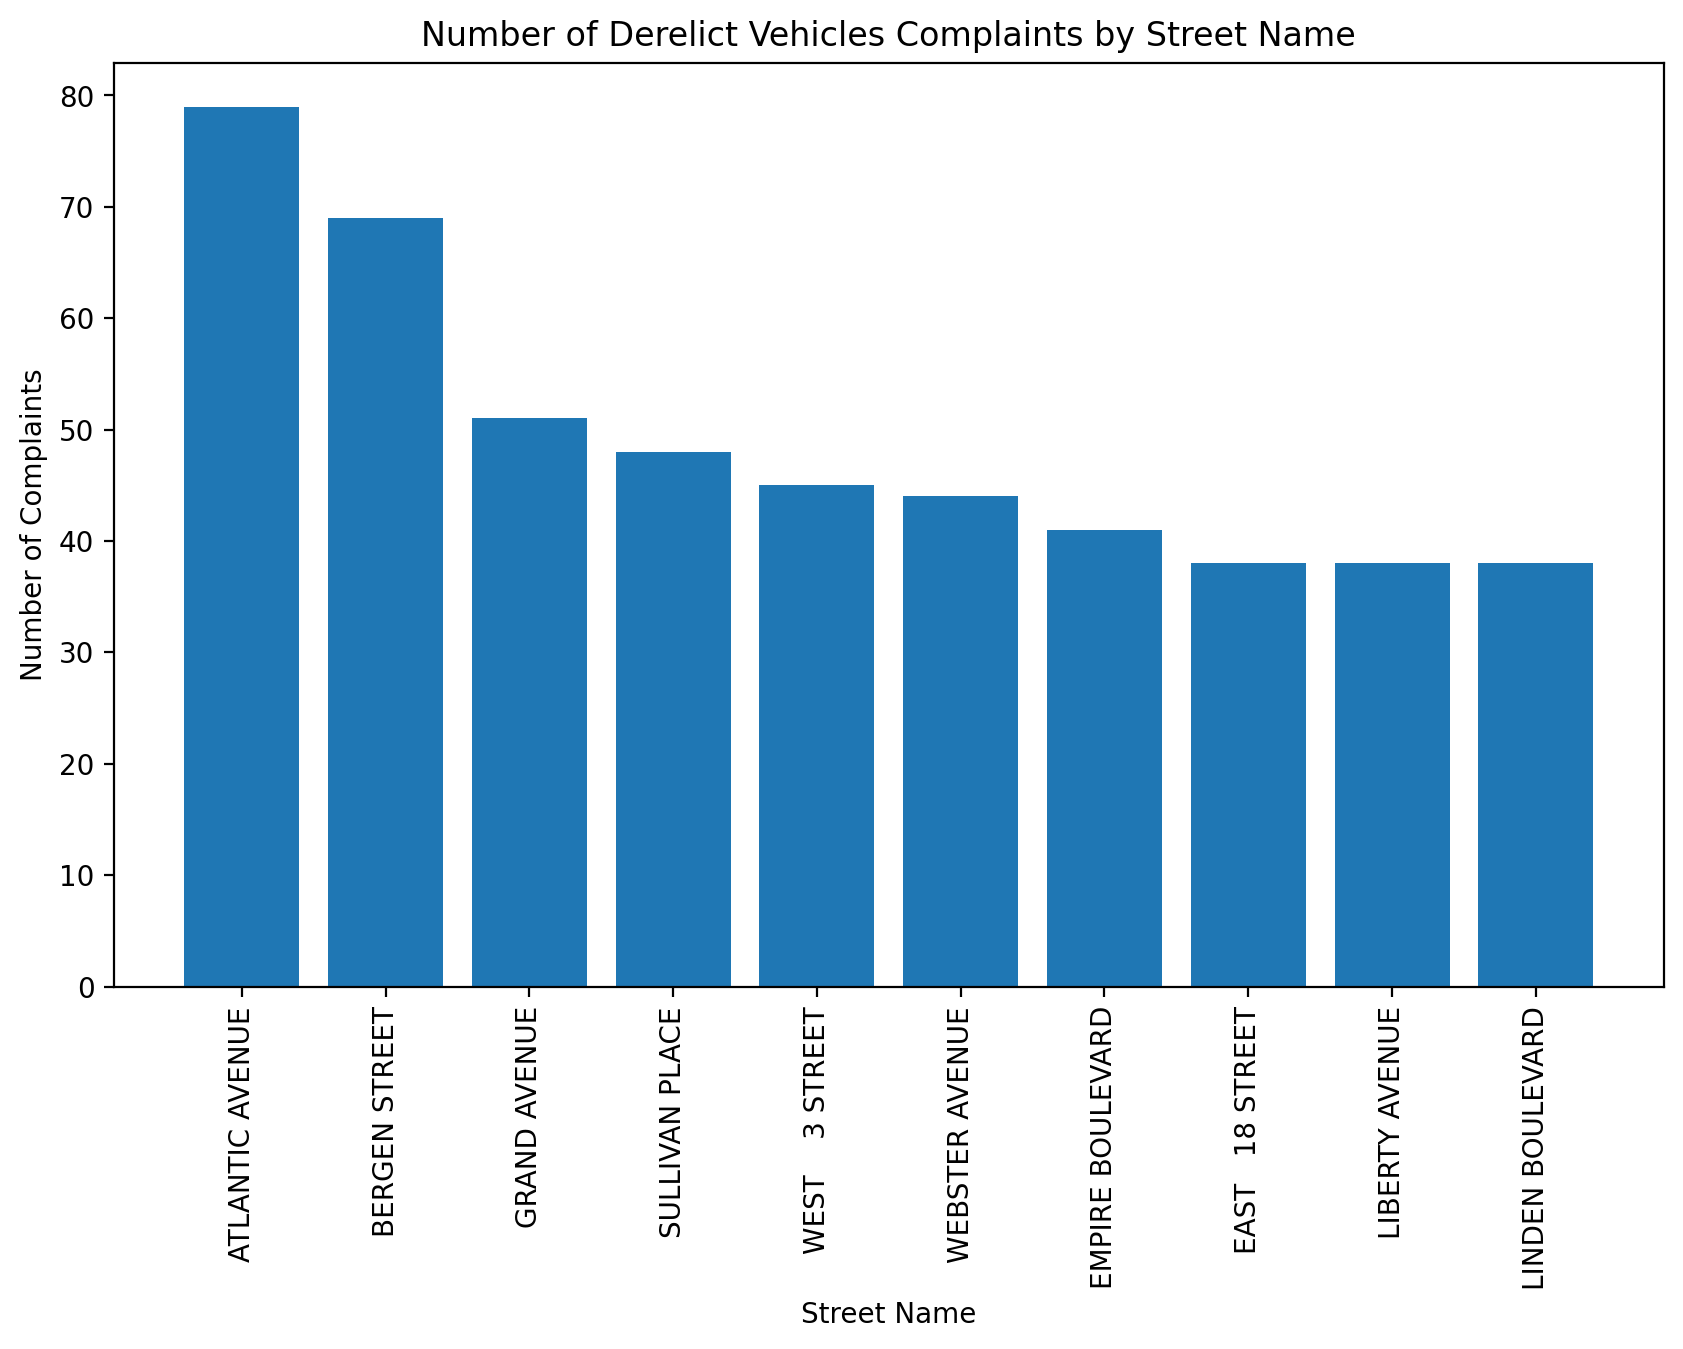

<Figure size 640x480 with 0 Axes>

In [162]:


# Select only the columns needed for this analysis
df = df[['Complaint Type', 'Street Name']]

# Filter the data to only include 'Derelict Vehicles' complaints
df = df[df['Complaint Type'] == 'Derelict Vehicles']

# Count the number of complaints for each street name
street_counts = df['Street Name'].value_counts().head(10)

# Create a bar chart to visualize the counts
plt.figure(figsize=(10, 6))
plt.bar(street_counts.index, street_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Street Name')
plt.ylabel('Number of Complaints')
plt.title('Number of Derelict Vehicles Complaints by Street Name')
plt.show()
plt.savefig('my_image17.png')

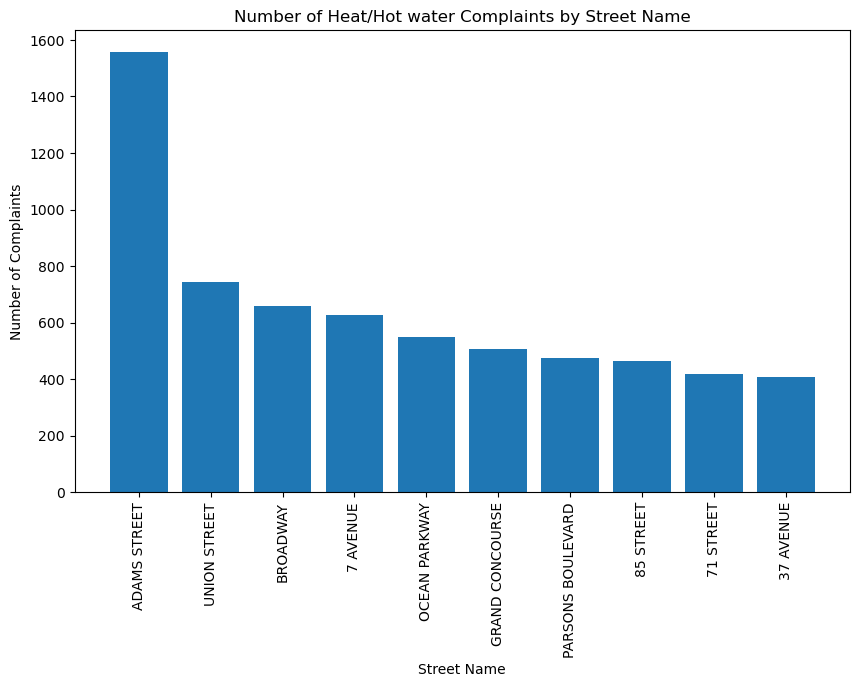

<Figure size 640x480 with 0 Axes>

In [81]:

# Select only the columns needed for this analysis
d_s = df_area[['Complaint Type', 'Street Name']]

# Filter the data to only include 'Derelict Vehicles' complaints
df = d_s[d_s['Complaint Type'] == 'HEAT/HOT WATER']

# Count the number of complaints for each street name
street_counts = df_area['Street Name'].value_counts().head(10)

# Create a bar chart to visualize the counts
plt.figure(figsize=(10, 6))
plt.bar(street_counts.index, street_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Street Name')
plt.ylabel('Number of Complaints')
plt.title('Number of Heat/Hot water Complaints by Street Name')
plt.show()
plt.savefig('my_image12.png')